In [1]:
import numpy as np
import cv2 as cv
import glob

from PIL import Image
from time import sleep
from IPython.display import display

In [3]:
images

['chessboard.jpg']

In [2]:
images = cv2.imread('board2.jpg')

In [26]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

img = cv.imread('captura2.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Find the chess board corners
ret, corners = cv.findChessboardCorners(gray, (7,7), None)
# If found, add object points, image points (after refining them)
if ret == True:
    objpoints.append(objp)
    corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
    imgpoints.append(corners)
    # Draw and display the corners
    cv.drawChessboardCorners(img, (7,7), corners2, ret)
    #cv.imshow('chessboard', img)
    #cv.waitKey(500)
#cv.destroyAllWindows()

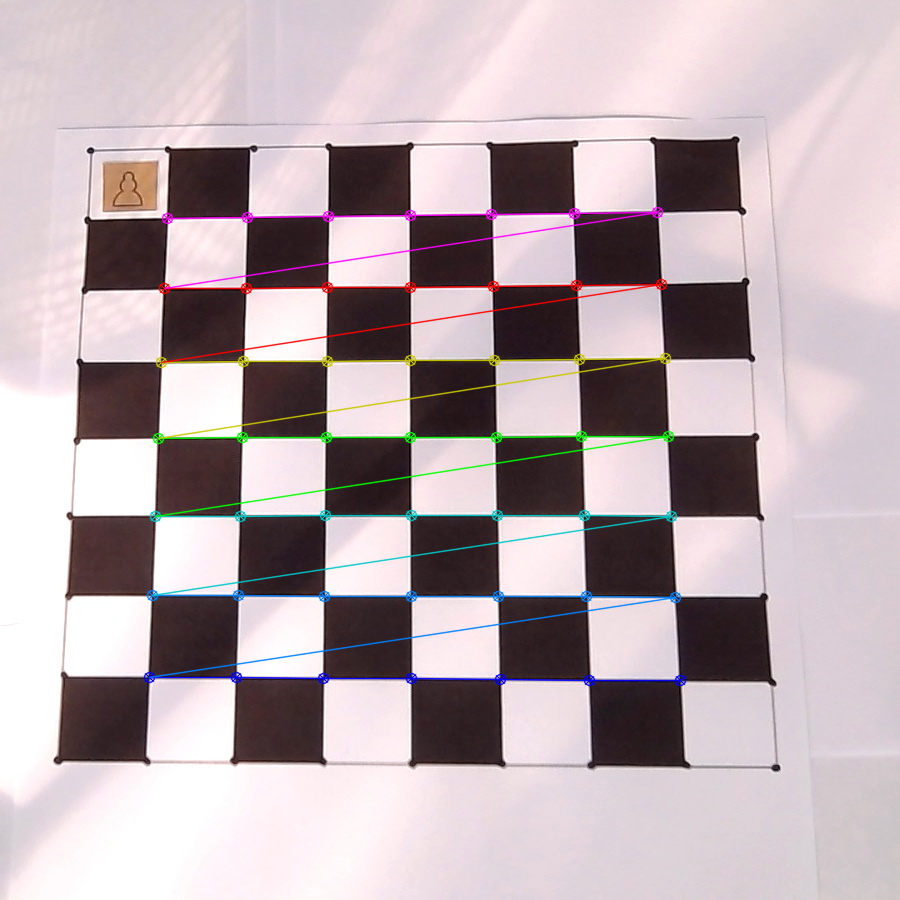

In [27]:
display(Image.fromarray(img))

In [28]:
len(imgpoints[0])

49

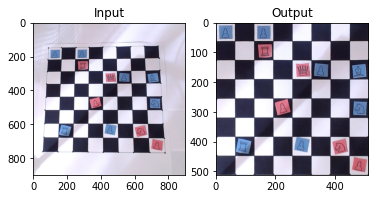

In [48]:
import matplotlib.pyplot as plt
img = cv.imread('captura3.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
rows,cols,ch = img.shape
pts1 = np.float32([[92,152],[737, 142],[57, 764],[780, 770]])
pts2 = np.float32([[0,0],[512,0],[0,512],[512,512]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(512,512))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [49]:
dst.shape

(512, 512, 3)

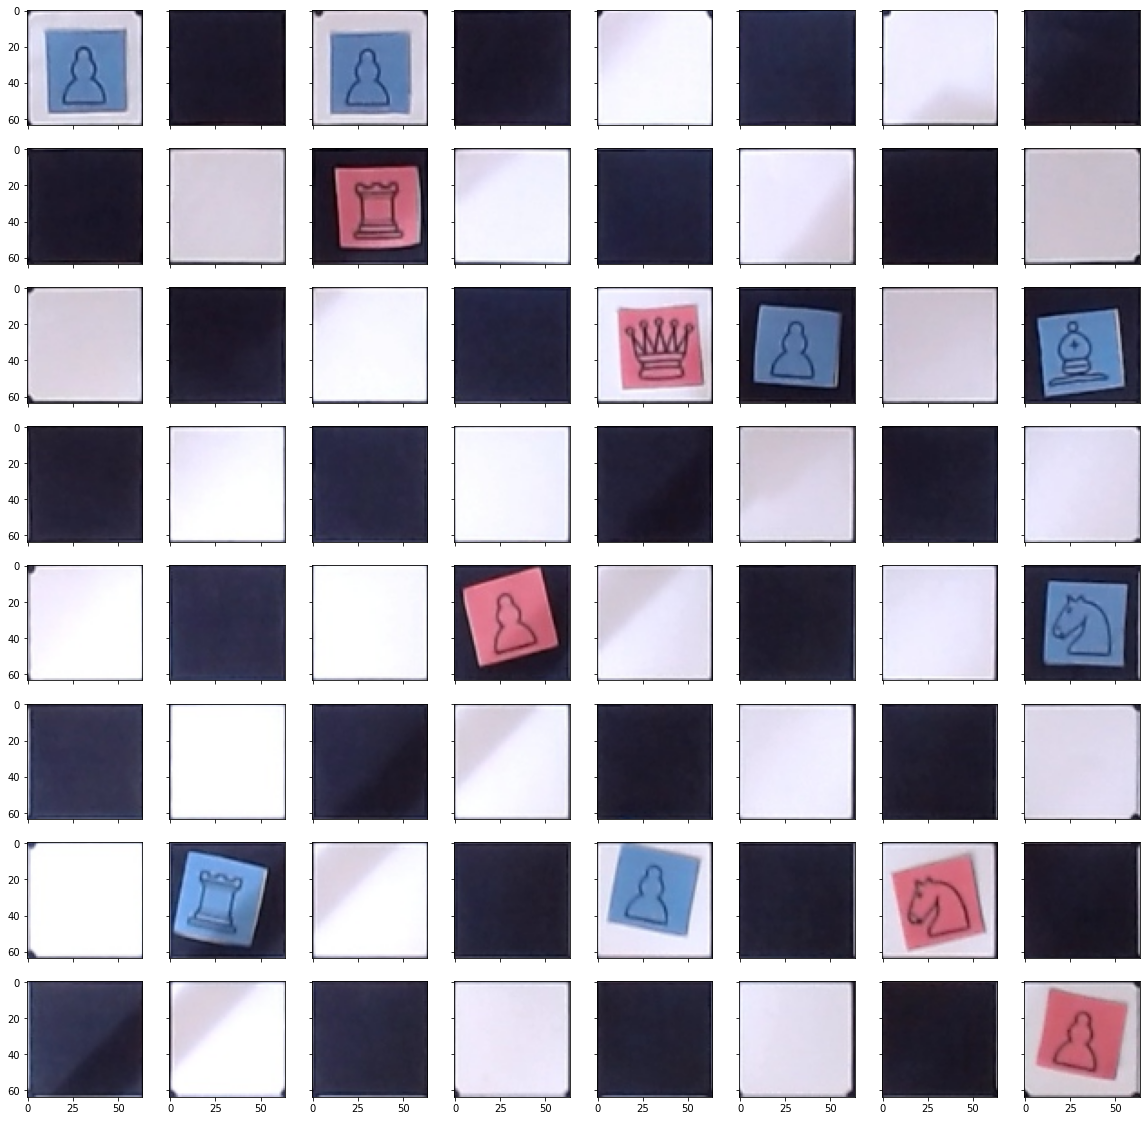

In [57]:
from PIL import Image
fig, axes = plt.subplots(nrows=8, ncols=8, sharex=True, sharey=True, figsize=(20,20))

for i in range(8):
    for j in range(8):
        img2 = dst[64*i:64*i + 64, 64*j:64*j + 64]
        Image.fromarray(img2).save('dataset/{0}__{1}_pillow.jpg'.format(i, j))
        axes[i][j].imshow(img2)